In [ ]:
#  Mapping Poverty in Los Angeles 
# ACS census Tract with 5 year Estimate Household Income (In 2021 Inflation Adjusted Dollars) 

In [125]:
import pandas as pd
import geopandas as gpd

In [126]:
# Importing the data 
df=pd.read_csv('data/R13291723_SL140.csv')

In [127]:
# Looking at the dimensions of the data 
df.shape

(2498, 88)

In [128]:
df.head

<bound method NDFrame.head of         Geo_FIPS                                          Geo_QName  \
0     6037101110  Census Tract 1011.10, Los Angeles County, Cali...   
1     6037101122  Census Tract 1011.22, Los Angeles County, Cali...   
2     6037101220  Census Tract 1012.20, Los Angeles County, Cali...   
3     6037101221  Census Tract 1012.21, Los Angeles County, Cali...   
4     6037101222  Census Tract 1012.22, Los Angeles County, Cali...   
...          ...                                                ...   
2493  6037980038  Census Tract 9800.38, Los Angeles County, Cali...   
2494  6037980039  Census Tract 9800.39, Los Angeles County, Cali...   
2495  6037990100  Census Tract 9901, Los Angeles County, California   
2496  6037990200  Census Tract 9902, Los Angeles County, California   
2497  6037990300  Census Tract 9903, Los Angeles County, California   

     Geo_FILEID Geo_STUSAB  Geo_SUMLEV  Geo_GEOCOMP  Geo_LOGRECNO  Geo_US  \
0         ACSSF         ca         140  

In [129]:
df.sample()

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,...,PCT_SE_A14001_008,PCT_SE_A14001_009,PCT_SE_A14001_010,PCT_SE_A14001_011,PCT_SE_A14001_012,PCT_SE_A14001_013,PCT_SE_A14001_014,PCT_SE_A14001_015,PCT_SE_A14001_016,PCT_SE_A14001_017
818,6037232402,"Census Tract 2324.02, Los Angeles County, Cali...",ACSSF,ca,140,0,5018,NaN,NaN,NaN,...,8.28,3.66,7.74,2.04,5.91,7.96,9.68,4.09,5.7,6.45


In [130]:
# Look at the data sample 
df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 88 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           2498 non-null   int64  
 1   Geo_QName          2498 non-null   object 
 2   Geo_FILEID         2498 non-null   object 
 3   Geo_STUSAB         2498 non-null   object 
 4   Geo_SUMLEV         2498 non-null   int64  
 5   Geo_GEOCOMP        2498 non-null   int64  
 6   Geo_LOGRECNO       2498 non-null   int64  
 7   Geo_US             0 non-null      float64
 8   Geo_REGION         0 non-null      float64
 9   Geo_DIVISION       0 non-null      float64
 10  Geo_STATECE        0 non-null      float64
 11  Geo_STATE          2498 non-null   int64  
 12  Geo_COUNTY         2498 non-null   int64  
 13  Geo_COUSUB         0 non-null      float64
 14  Geo_PLACE          0 non-null      float64
 15  Geo_TRACT          2498 non-null   int64  
 16  Geo_BLKGRP         0 non

In [131]:
df.Geo_FIPS.head()

0    6037101110
1    6037101122
2    6037101220
3    6037101221
4    6037101222
Name: Geo_FIPS, dtype: int64

In [132]:
df.Geo_STATE.head()

0    6
1    6
2    6
3    6
4    6
Name: Geo_STATE, dtype: int64

In [133]:
df.Geo_COUNTY.head()

0    37
1    37
2    37
3    37
4    37
Name: Geo_COUNTY, dtype: int64

In [134]:
# Have to conver the FIPS code into strings
df = pd.read_csv(
    'data/R13291723_SL140.csv',
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    }
)

In [135]:
df.Geo_FIPS.head()

0    06037101110
1    06037101122
2    06037101220
3    06037101221
4    06037101222
Name: Geo_FIPS, dtype: object

In [136]:
# Looking at columns that have all empty values
df.columns[df.isna().all()].tolist()

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_STATECE',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_BLKGRP',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITSCE',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_UACP',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_VTD',
 'Geo_ZCTA3',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_TAZ',
 'Geo_UGA',
 'Geo_PUMA5',
 'Geo_PUMA1',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PLACESE']

In [137]:
# Cleaning the data that have empty values 
df=df.dropna(axis=1,how="all")

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           2498 non-null   object 
 1   Geo_QName          2498 non-null   object 
 2   Geo_FILEID         2498 non-null   object 
 3   Geo_STUSAB         2498 non-null   object 
 4   Geo_SUMLEV         2498 non-null   int64  
 5   Geo_GEOCOMP        2498 non-null   int64  
 6   Geo_LOGRECNO       2498 non-null   int64  
 7   Geo_STATE          2498 non-null   object 
 8   Geo_COUNTY         2498 non-null   object 
 9   Geo_TRACT          2498 non-null   int64  
 10  Geo_GEOID          2498 non-null   object 
 11  Geo_NAME           2498 non-null   object 
 12  SE_A14001_001      2498 non-null   int64  
 13  SE_A14001_002      2498 non-null   int64  
 14  SE_A14001_003      2498 non-null   int64  
 15  SE_A14001_004      2498 non-null   int64  
 16  SE_A14001_005      2498 

In [139]:
df.columns 

Index(['Geo_FIPS', 'Geo_QName', 'Geo_FILEID', 'Geo_STUSAB', 'Geo_SUMLEV',
       'Geo_GEOCOMP', 'Geo_LOGRECNO', 'Geo_STATE', 'Geo_COUNTY', 'Geo_TRACT',
       'Geo_GEOID', 'Geo_NAME', 'SE_A14001_001', 'SE_A14001_002',
       'SE_A14001_003', 'SE_A14001_004', 'SE_A14001_005', 'SE_A14001_006',
       'SE_A14001_007', 'SE_A14001_008', 'SE_A14001_009', 'SE_A14001_010',
       'SE_A14001_011', 'SE_A14001_012', 'SE_A14001_013', 'SE_A14001_014',
       'SE_A14001_015', 'SE_A14001_016', 'SE_A14001_017', 'PCT_SE_A14001_002',
       'PCT_SE_A14001_003', 'PCT_SE_A14001_004', 'PCT_SE_A14001_005',
       'PCT_SE_A14001_006', 'PCT_SE_A14001_007', 'PCT_SE_A14001_008',
       'PCT_SE_A14001_009', 'PCT_SE_A14001_010', 'PCT_SE_A14001_011',
       'PCT_SE_A14001_012', 'PCT_SE_A14001_013', 'PCT_SE_A14001_014',
       'PCT_SE_A14001_015', 'PCT_SE_A14001_016', 'PCT_SE_A14001_017'],
      dtype='object')

In [225]:
# Define columns to keep
columns_to_keep = ['Geo_FIPS',
                   'SE_A14001_002',
                   'SE_A14001_003',
                   'SE_A14001_004',
                   'SE_A14001_005',
                   'SE_A14001_006',
                   'SE_A14001_007',
                   'SE_A14001_008',
                   'SE_A14001_009',
                   'SE_A14001_010',
                   'SE_A14001_011',
                   'SE_A14001_012',
                   'SE_A14001_013',
                   'SE_A14001_014',
                   'SE_A14001_015',
                   'SE_A14001_016',
                   'SE_A14001_017',
                  ]

In [226]:
df2 = df[columns_to_keep]
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Geo_FIPS       2498 non-null   object
 1   SE_A14001_002  2498 non-null   int64 
 2   SE_A14001_003  2498 non-null   int64 
 3   SE_A14001_004  2498 non-null   int64 
 4   SE_A14001_005  2498 non-null   int64 
 5   SE_A14001_006  2498 non-null   int64 
 6   SE_A14001_007  2498 non-null   int64 
 7   SE_A14001_008  2498 non-null   int64 
 8   SE_A14001_009  2498 non-null   int64 
 9   SE_A14001_010  2498 non-null   int64 
 10  SE_A14001_011  2498 non-null   int64 
 11  SE_A14001_012  2498 non-null   int64 
 12  SE_A14001_013  2498 non-null   int64 
 13  SE_A14001_014  2498 non-null   int64 
 14  SE_A14001_015  2498 non-null   int64 
 15  SE_A14001_016  2498 non-null   int64 
 16  SE_A14001_017  2498 non-null   int64 
dtypes: int64(16), object(1)
memory usage: 331.9+ KB


In [227]:
# Rename the columns 
columns = list(df2)
columns

['Geo_FIPS',
 'SE_A14001_002',
 'SE_A14001_003',
 'SE_A14001_004',
 'SE_A14001_005',
 'SE_A14001_006',
 'SE_A14001_007',
 'SE_A14001_008',
 'SE_A14001_009',
 'SE_A14001_010',
 'SE_A14001_011',
 'SE_A14001_012',
 'SE_A14001_013',
 'SE_A14001_014',
 'SE_A14001_015',
 'SE_A14001_016',
 'SE_A14001_017']

In [228]:
df2.columns = ['FIPS',               
'Less than $10,000',
'$10,000-$14,999',
'$15,000-$19,999',
'$20,000-$24,999',
'$25,000-$29,999',
'$30,000-$34,999',
'$35,000-$39,999',
'$40,000-$44,999',
'$45,000-$49,999',
'$50,000-$59,999',
'$60,000-$74,999',
'$75,000-$99,999',
'$100,000-$124,999',
'$125,000-$149,999',
'$150,000-$199,999',
'More than $200,000']

In [229]:
# Making sure the data works 
df2.head(10)

,FIPS,"Less than $10,000","$10,000-$14,999","$15,000-$19,999","$20,000-$24,999","$25,000-$29,999","$30,000-$34,999","$35,000-$39,999","$40,000-$44,999","$45,000-$49,999","$50,000-$59,999","$60,000-$74,999","$75,000-$99,999","$100,000-$124,999","$125,000-$149,999","$150,000-$199,999","More than $200,000"
0,06037101110,54,126,49,33,61,6,60,85,43,149,105,146,210,134,143,90
1,06037101122,88,0,7,42,50,36,0,13,0,37,200,158,126,194,168,253
2,06037101220,78,82,28,102,7,86,43,55,36,189,89,134,116,60,140,112
3,06037101221,76,107,118,148,0,81,111,27,97,112,32,193,207,33,108,0
4,06037101222,161,167,34,41,19,116,0,86,14,35,44,96,9,81,0,32
5,06037101300,68,27,37,15,43,44,41,16,14,40,123,132,188,161,221,250
6,06037101400,7,98,57,176,29,25,25,45,63,82,68,92,208,59,173,97
7,06037102103,24,0,33,40,13,101,46,0,37,12,59,46,39,114,65,40
8,06037102104,54,74,11,18,18,0,59,125,18,40,89,209,185,113,92,205
9,06037102105,5,21,13,6,45,0,20,13,21,74,25,145,20,18,80,48


In [230]:
# Doing some stats 
df2.mean()

FIPS                         inf
Less than $10,000      72.449960
$10,000-$14,999        57.170536
$15,000-$19,999        44.971978
$20,000-$24,999        48.451561
$25,000-$29,999        47.781025
$30,000-$34,999        48.839872
$35,000-$39,999        46.261809
$40,000-$44,999        46.542834
$45,000-$49,999        41.182946
$50,000-$59,999        86.848679
$60,000-$74,999       118.791033
$75,000-$99,999       166.070456
$100,000-$124,999     130.196157
$125,000-$149,999      95.133307
$150,000-$199,999     119.851481
More than $200,000    167.651321
dtype: float64

In [231]:
# access a single column like df['col_name']
df2.head()

,FIPS,"Less than $10,000","$10,000-$14,999","$15,000-$19,999","$20,000-$24,999","$25,000-$29,999","$30,000-$34,999","$35,000-$39,999","$40,000-$44,999","$45,000-$49,999","$50,000-$59,999","$60,000-$74,999","$75,000-$99,999","$100,000-$124,999","$125,000-$149,999","$150,000-$199,999","More than $200,000"
0,06037101110,54,126,49,33,61,6,60,85,43,149,105,146,210,134,143,90
1,06037101122,88,0,7,42,50,36,0,13,0,37,200,158,126,194,168,253
2,06037101220,78,82,28,102,7,86,43,55,36,189,89,134,116,60,140,112
3,06037101221,76,107,118,148,0,81,111,27,97,112,32,193,207,33,108,0
4,06037101222,161,167,34,41,19,116,0,86,14,35,44,96,9,81,0,32


In [232]:
# IDK if this is right but 72 households fall in the less than $10,000 category of all households in LA county 
df2['Less than $10,000'].mean()

72.44995996797438

In [233]:
df2.median()

FIPS                  6.037403e+09
Less than $10,000     5.600000e+01
$10,000-$14,999       3.950000e+01
$15,000-$19,999       3.500000e+01
$20,000-$24,999       3.800000e+01
$25,000-$29,999       3.900000e+01
$30,000-$34,999       4.000000e+01
$35,000-$39,999       3.800000e+01
$40,000-$44,999       3.700000e+01
$45,000-$49,999       3.300000e+01
$50,000-$59,999       7.500000e+01
$60,000-$74,999       1.080000e+02
$75,000-$99,999       1.520000e+02
$100,000-$124,999     1.160000e+02
$125,000-$149,999     8.100000e+01
$150,000-$199,999     9.800000e+01
More than $200,000    9.300000e+01
dtype: float64

In [234]:
df2.describe()

,"Less than $10,000","$10,000-$14,999","$15,000-$19,999","$20,000-$24,999","$25,000-$29,999","$30,000-$34,999","$35,000-$39,999","$40,000-$44,999","$45,000-$49,999","$50,000-$59,999","$60,000-$74,999","$75,000-$99,999","$100,000-$124,999","$125,000-$149,999","$150,000-$199,999","More than $200,000"
count,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000
mean,72.449960,57.170536,44.971978,48.451561,47.781025,48.839872,46.261809,46.542834,41.182946,86.848679,118.791033,166.070456,130.196157,95.133307,119.851481,167.651321
std,66.418095,61.275108,42.493949,43.369387,40.462105,42.166356,40.802447,41.911839,37.254396,60.727741,72.477268,96.094049,84.723891,71.385568,95.386917,195.967684
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,15.000000,14.000000,16.000000,17.000000,17.000000,17.000000,17.000000,14.000000,44.000000,66.000000,99.000000,70.250000,43.000000,50.000000,33.000000
50%,56.000000,39.500000,35.000000,38.000000,39.000000,40.000000,38.000000,37.000000,33.000000,75.000000,108.000000,152.000000,116.000000,81.000000,98.000000,93.000000
75%,97.000000,80.000000,64.000000,68.000000,68.000000,69.000000,65.000000,64.000000,59.000000,116.000000,160.000000,217.000000,176.000000,133.000000,167.000000,231.000000
max,545.000000,709.000000,366.000000,402.000000,359.000000,356.000000,417.000000,432.000000,363.000000,581.000000,496.000000,714.000000,834.000000,505.000000,816.000000,1965.000000


<AxesSubplot: title={'center': 'Average LA County total household income'}>

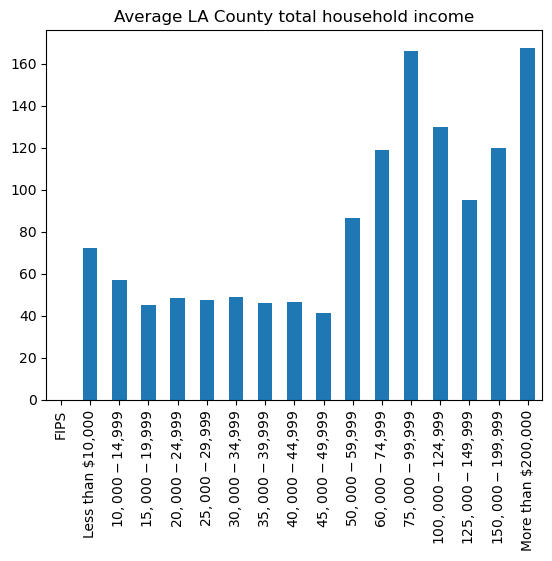

In [237]:
#Average the percentage within each income range and plot
df2.mean().plot.bar(title = "Average LA County total household income")

In [240]:
df.columns

Index(['Geo_FIPS', 'Geo_QName', 'Geo_FILEID', 'Geo_STUSAB', 'Geo_SUMLEV',
       'Geo_GEOCOMP', 'Geo_LOGRECNO', 'Geo_STATE', 'Geo_COUNTY', 'Geo_TRACT',
       'Geo_GEOID', 'Geo_NAME', 'SE_A14001_001', 'SE_A14001_002',
       'SE_A14001_003', 'SE_A14001_004', 'SE_A14001_005', 'SE_A14001_006',
       'SE_A14001_007', 'SE_A14001_008', 'SE_A14001_009', 'SE_A14001_010',
       'SE_A14001_011', 'SE_A14001_012', 'SE_A14001_013', 'SE_A14001_014',
       'SE_A14001_015', 'SE_A14001_016', 'SE_A14001_017', 'PCT_SE_A14001_002',
       'PCT_SE_A14001_003', 'PCT_SE_A14001_004', 'PCT_SE_A14001_005',
       'PCT_SE_A14001_006', 'PCT_SE_A14001_007', 'PCT_SE_A14001_008',
       'PCT_SE_A14001_009', 'PCT_SE_A14001_010', 'PCT_SE_A14001_011',
       'PCT_SE_A14001_012', 'PCT_SE_A14001_013', 'PCT_SE_A14001_014',
       'PCT_SE_A14001_015', 'PCT_SE_A14001_016', 'PCT_SE_A14001_017'],
      dtype='object')

In [241]:
# Want to create a total households population
df3 = ['Less than $10,000',
'$10,000-$14,999',
'$15,000-$19,999',
'$20,000-$24,999',
'$25,000-$29,999',
'$30,000-$34,999',
'$35,000-$39,999',
'$40,000-$44,999',
'$45,000-$49,999',
'$50,000-$59,999',
'$60,000-$74,999',
'$75,000-$99,999',
'$100,000-$124,999',
'$125,000-$149,999',
'$150,000-$199,999',
'More than $200,000']

In [242]:
df2['TotalPop'] = df2[df3].sum(axis = 1)
df2.head(3)

/tmp/ipykernel_67/337586398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TotalPop'] = df2[df3].sum(axis = 1)


,FIPS,"Less than $10,000","$10,000-$14,999","$15,000-$19,999","$20,000-$24,999","$25,000-$29,999","$30,000-$34,999","$35,000-$39,999","$40,000-$44,999","$45,000-$49,999","$50,000-$59,999","$60,000-$74,999","$75,000-$99,999","$100,000-$124,999","$125,000-$149,999","$150,000-$199,999","More than $200,000",TotalPop
0,06037101110,54,126,49,33,61,6,60,85,43,149,105,146,210,134,143,90,1494
1,06037101122,88,0,7,42,50,36,0,13,0,37,200,158,126,194,168,253,1372
2,06037101220,78,82,28,102,7,86,43,55,36,189,89,134,116,60,140,112,1357


In [246]:
# Notice that the SE_A14001_001 is household number of resondents by census tract
df3 = pd.read_csv("data/R13291723_SL140.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df3.head(5)

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATECE,Geo_STATE,Geo_COUNTY,Geo_COUSUB,Geo_PLACE,Geo_TRACT,Geo_BLKGRP,Geo_CONCIT,Geo_AIANHH,Geo_AIANHHFP,Geo_AIHHTLI,Geo_AITSCE,Geo_AITS,Geo_ANRC,Geo_CBSA,Geo_CSA,Geo_METDIV,Geo_MACC,Geo_MEMI,Geo_NECTA,Geo_CNECTA,Geo_NECTADIV,Geo_UA,Geo_UACP,Geo_CDCURR,Geo_SLDU,Geo_SLDL,Geo_VTD,Geo_ZCTA3,Geo_ZCTA5,Geo_SUBMCD,Geo_SDELM,Geo_SDSEC,Geo_SDUNI,Geo_UR,Geo_PCI,Geo_TAZ,Geo_UGA,Geo_PUMA5,Geo_PUMA1,Geo_GEOID,Geo_NAME,Geo_BTTR,Geo_BTBG,Geo_PLACESE,SE_A14001_001,SE_A14001_002,SE_A14001_003,SE_A14001_004,SE_A14001_005,SE_A14001_006,SE_A14001_007,SE_A14001_008,SE_A14001_009,SE_A14001_010,SE_A14001_011,SE_A14001_012,SE_A14001_013,SE_A14001_014,SE_A14001_015,SE_A14001_016,SE_A14001_017,PCT_SE_A14001_002,PCT_SE_A14001_003,PCT_SE_A14001_004,PCT_SE_A14001_005,PCT_SE_A14001_006,PCT_SE_A14001_007,PCT_SE_A14001_008,PCT_SE_A14001_009,PCT_SE_A14001_010,PCT_SE_A14001_011,PCT_SE_A14001_012,PCT_SE_A14001_013,PCT_SE_A14001_014,PCT_SE_A14001_015,PCT_SE_A14001_016,PCT_SE_A14001_017
0,6037101110,"Census Tract 1011.10, Los Angeles County, Cali...",ACSSF,ca,140,0,4200,NaN,NaN,NaN,NaN,6,37,NaN,NaN,101110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US06037101110,Census Tract 1011.10,NaN,NaN,NaN,1494,54,126,49,33,61,6,60,85,43,149,105,146,210,134,143,90,3.61,8.43,3.28,2.21,4.08,0.40,4.02,5.69,2.88,9.97,7.03,9.77,14.06,8.97,9.57,6.02
1,6037101122,"Census Tract 1011.22, Los Angeles County, Cali...",ACSSF,ca,140,0,4201,NaN,NaN,NaN,NaN,6,37,NaN,NaN,101122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US06037101122,Census Tract 1011.22,NaN,NaN,NaN,1372,88,0,7,42,50,36,0,13,0,37,200,158,126,194,168,253,6.41,0.00,0.51,3.06,3.64,2.62,0.00,0.95,0.00,2.70,14.58,11.52,9.18,14.14,12.24,18.44
2,6037101220,"Census Tract 1012.20, Los Angeles County, Cali...",ACSSF,ca,140,0,4202,NaN,NaN,NaN,NaN,6,37,NaN,NaN,101220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US06037101220,Census Tract 1012.20,NaN,NaN,NaN,1357,78,82,28,102,7,86,43,55,36,189,89,134,116,60,140,112,5.75,6.04,2.06,7.52,0.52,6.34,3.17,4.05,2.65,13.93,6.56,9.87,8.55,4.42,10.32,8.25
3,6037101221,"Census Tract 1012.21, Los Angeles County, Cali...",ACSSF,ca,140,0,4203,NaN,NaN,NaN,NaN,6,37,NaN,NaN,101221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US06037101221,Census Tract 1012.21,NaN,NaN,NaN,1450,76,107,118,148,0,81,111,27,97,112,32,193,207,33,108,0,5.24,7.38,8.14,10.21,0.00,5.59,7.66,1.86,6.69,7.72,2.21,13.31,14.28,2.28,7.45,0.00
4,6037101222,"Census Tract 1012.22, Los Angeles County, Cali...",ACSSF,ca,140,0,4204,NaN,NaN,NaN,NaN,6,37,NaN,NaN,101222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US06037101222,Census Tract 1012.22,NaN,NaN,NaN,935,161,167,34,41,19,116,0,86,14,35,44,96,9,81,0,32,17.22,17.86,3.64,4.39,2.03,12.41,0.00,9.20,1.50,3.74,4.71,10.27,0.96,8.66,0.00,3.42


In [245]:
df_householdsize = df3['SE_A14001_001']
df_householdsize.sample(10)

1487    2269
1055    1029
839     1754
262     1270
1194    1299
1289     865
1002    1865
2426     819
1183    1328
713     1896
Name: SE_A14001_001, dtype: int64

In [247]:
df_householdsize.describe()

count    2498.000000
mean     1338.194956
std       544.558643
min         0.000000
25%       981.000000
50%      1287.000000
75%      1620.750000
max      5202.000000
Name: SE_A14001_001, dtype: float64

In [255]:
# Creating a poverty column variable 
df2['poverty'] = df2['Less than $10,000'] + df2['$10,000-$14,999'] + df2['$15,000-$19,999'] + df2['$20,000-$24,999'] 
df2.sample(5)

/tmp/ipykernel_67/3305094393.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['poverty'] = df2['Less than $10,000'] + df2['$10,000-$14,999'] + df2['$15,000-$19,999'] + df2['$20,000-$24,999']


,FIPS,"Less than $10,000","$10,000-$14,999","$15,000-$19,999","$20,000-$24,999","$25,000-$29,999","$30,000-$34,999","$35,000-$39,999","$40,000-$44,999","$45,000-$49,999","$50,000-$59,999","$60,000-$74,999","$75,000-$99,999","$100,000-$124,999","$125,000-$149,999","$150,000-$199,999","More than $200,000",TotalPop,poverty,pct_poverty,p_poverty
1957,06037570703,78,32,21,0,53,27,8,10,9,43,48,122,120,156,147,98,972,131,13.477366,13.477366
1636,06037503902,7,8,18,39,5,32,5,20,63,25,167,276,244,207,191,195,1502,72,4.793609,4.793609
2099,06037602103,184,197,73,164,124,62,32,80,76,121,266,68,125,92,50,54,1768,618,34.954751,34.954751
1460,06037460501,31,18,23,0,9,29,0,25,0,31,74,93,121,88,357,817,1716,72,4.195804,4.195804
2476,06037980018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN


In [257]:
#Creating a poverty and total population to get a percent 
df2['p_poverty'] = df2['poverty']/df2['TotalPop']*100
df2.sample(10)

/tmp/ipykernel_67/3666134208.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['p_poverty'] = df2['poverty']/df2['TotalPop']*100


,FIPS,"Less than $10,000","$10,000-$14,999","$15,000-$19,999","$20,000-$24,999","$25,000-$29,999","$30,000-$34,999","$35,000-$39,999","$40,000-$44,999","$45,000-$49,999","$50,000-$59,999","$60,000-$74,999","$75,000-$99,999","$100,000-$124,999","$125,000-$149,999","$150,000-$199,999","More than $200,000",TotalPop,poverty,pct_poverty,p_poverty
361,06037139802,47,65,0,0,0,76,12,12,54,70,36,85,88,48,113,674,1380,112,8.115942,8.115942
2110,06037602504,73,118,41,117,32,221,88,55,139,53,235,236,203,63,120,56,1850,349,18.864865,18.864865
90,06037111304,131,114,85,0,105,44,19,44,102,58,136,104,215,119,56,0,1332,330,24.774775,24.774775
2020,06037575801,33,39,20,70,38,133,58,30,6,53,90,99,46,39,0,2,756,162,21.428571,21.428571
1230,06037402703,54,39,57,77,45,30,4,15,40,206,148,267,112,87,89,78,1348,227,16.839763,16.839763
2249,06037700902,219,76,89,118,36,126,32,91,145,253,237,426,132,307,408,561,3256,502,15.417690,15.417690
1638,06037504002,55,20,102,10,32,30,0,0,16,7,202,169,189,168,340,159,1499,187,12.474983,12.474983
2083,06037601211,32,67,146,135,52,0,68,55,71,81,63,85,116,62,18,13,1064,380,35.714286,35.714286
816,06037232300,83,47,27,62,11,0,58,53,86,94,165,95,44,139,133,84,1181,219,18.543607,18.543607
2405,06037920020,16,40,0,32,86,0,31,15,90,167,160,200,236,175,253,361,1862,88,4.726101,4.726101


<AxesSubplot: ylabel='Frequency'>

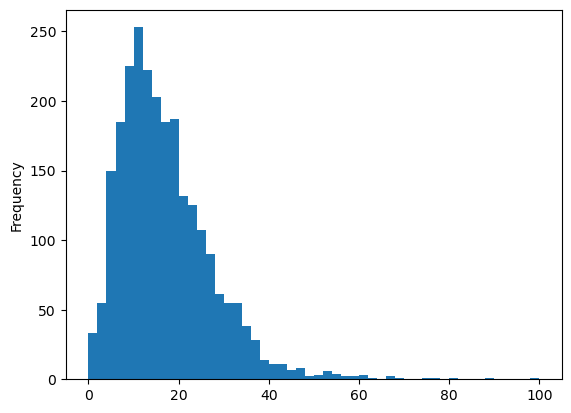

In [258]:
df2['p_poverty'].plot.hist(bins=50)

In [259]:
# top 10 census of households income that live in poverty. 
df_sorted = df2.sort_values(by='p_poverty',ascending = False)
df_sorted[['FIPS','p_poverty']].head(10)

,FIPS,p_poverty
2488,06037980033,100.000000
588,06037206301,89.275635
589,06037206302,80.190174
590,06037206303,76.470588
2469,06037980011,75.000000
2475,06037980017,68.421053
771,06037224702,67.293777
595,06037207304,67.005380
598,06037207307,63.910422
942,06037265307,61.126761


<AxesSubplot: xlabel='FIPS'>

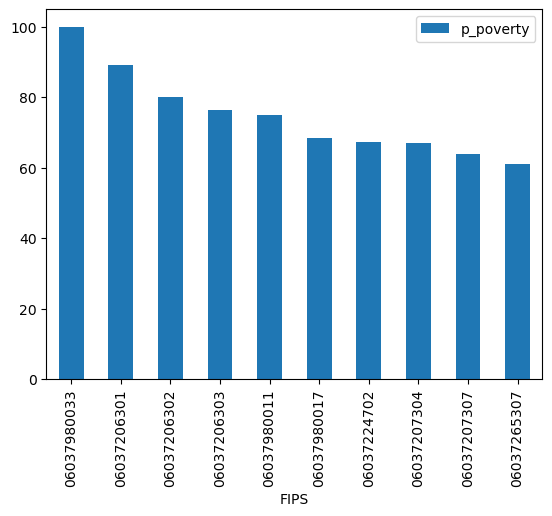

In [261]:
df_sorted.head(10).plot.bar(x='FIPS',
                            y='p_poverty')

<AxesSubplot: title={'center': 'Top 10 Census Tracts with Housholds poverty income in Los Angele'}, ylabel='FIPS'>

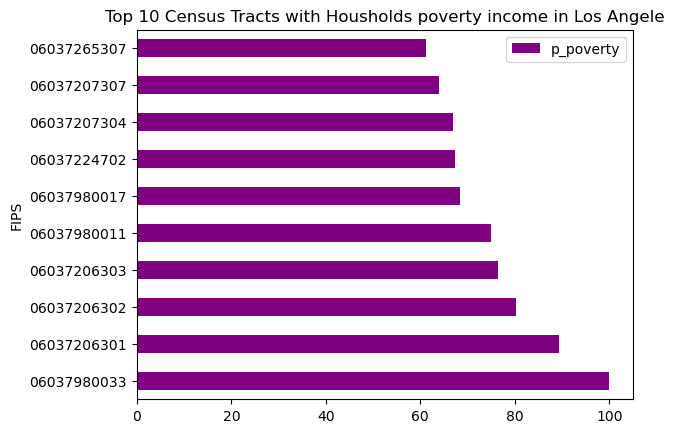

In [264]:
df_sorted.head(10).plot.barh(x='FIPS',  # barh turns the plot direction 
                            y='p_poverty', 
                            title='Top 10 Census Tracts with Housholds poverty income in Los Angele',
                            color='Purple')

In [265]:
# Let show our data in a map 

In [266]:
# Import geopandas library to visualize data
import geopandas as gpd

In [267]:
# Import geojson file of LA County
tracts=gpd.read_file('data/Census_Tracts_2020.geojson')
tracts.head(2)

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."


In [268]:
# Create a FIPS column to prepare for merging data
tracts['FIPS'] ='06' + '037' + tracts['CT20']

In [269]:
# Create a new dataframe to merge the geospatial data with the household data
tracts=tracts.merge(df2, on="FIPS")

In [270]:
# Look at merged dataframe
tracts.head(3)

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry,FIPS,"Less than $10,000","$10,000-$14,999","$15,000-$19,999","$20,000-$24,999","$25,000-$29,999","$30,000-$34,999","$35,000-$39,999","$40,000-$44,999","$45,000-$49,999","$50,000-$59,999","$60,000-$74,999","$75,000-$99,999","$100,000-$124,999","$125,000-$149,999","$150,000-$199,999","More than $200,000",TotalPop,poverty,pct_poverty,p_poverty
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110,54,126,49,33,61,6,60,85,43,149,105,146,210,134,143,90,1494,262,17.536814,17.536814
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122,88,0,7,42,50,36,0,13,0,37,200,158,126,194,168,253,1372,137,9.985423,9.985423
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220,78,82,28,102,7,86,43,55,36,189,89,134,116,60,140,112,1357,290,21.370671,21.370671


<AxesSubplot: >

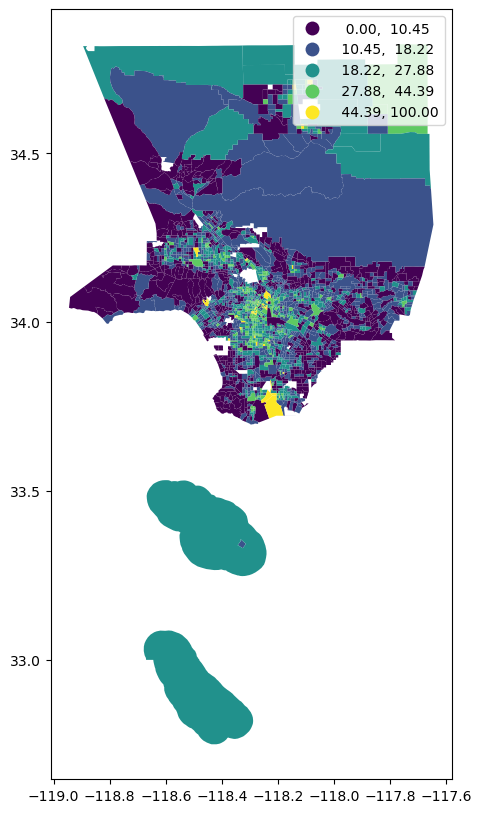

In [272]:
# scheme='NaturalBreaks'
tracts.plot(figsize=(12,10),
                 column='p_poverty',
                 legend=True, 
                 scheme='NaturalBreaks')

<AxesSubplot: >

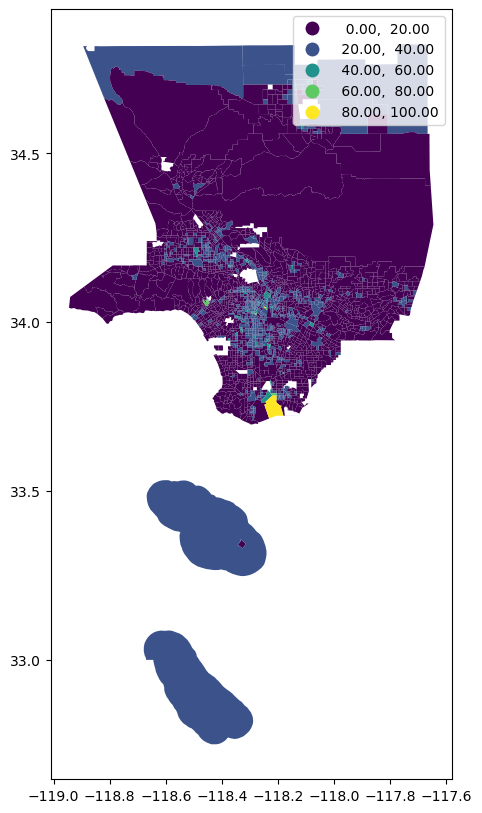

In [274]:
tracts.plot(figsize=(12,10),
                 column='p_poverty',
                 legend=True, 
                 scheme='equal_interval')

<AxesSubplot: >

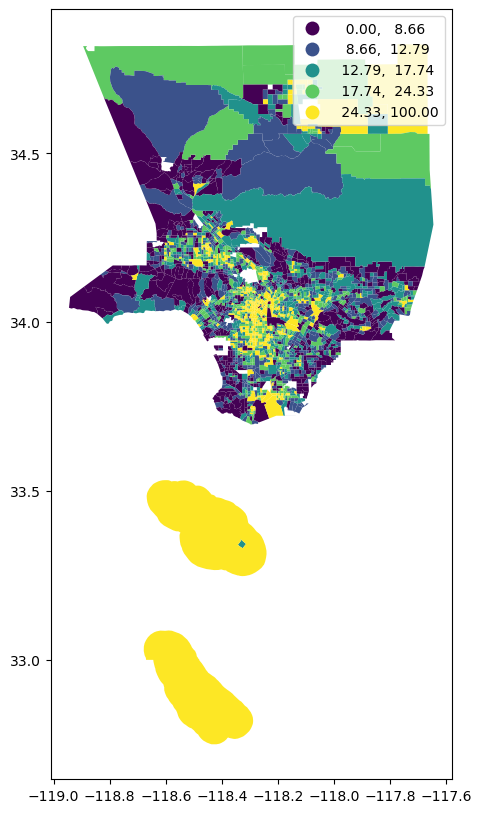

In [275]:
tracts.plot(figsize=(12,10),
                 column='p_poverty',
                 legend=True, 
                 scheme='quantiles')